<a href="https://colab.research.google.com/github/dmc-mcc/DSI/blob/main/Copy_of_masterStocksData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - 4**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time
import datetime


def download_historical_data(symbol, start_date, end_date):
    try:
        # Download historical data from Yahoo Finance
        stock_data = yf.download(symbol, start=start_date, end=end_date)

    except Exception as e:
        print(f"Error downloading data for {symbol}: {e}")

    # Combine data into a single DataFrame
    df = pd.DataFrame(stock_data)

    # Save data to a CSV file

    return df

# Define symbols and date range




In [ ]:

start_date = '2021-01-01'
end_date = '2023-12-31'


# Download historical data
dow = download_historical_data( "^DJI", start_date, end_date)
nasdaq = download_historical_data( "^IXIC", start_date, end_date)
nifty = download_historical_data( "^NSEI", start_date, end_date)
dax = download_historical_data( "^GDAXI", start_date, end_date)
hangseng = download_historical_data( "^HSI", start_date, end_date)
nikkei = download_historical_data( "^N225", start_date, end_date)

vix = download_historical_data( "^VIX", start_date, end_date)


# Display the downloaded data
print(dow.head())



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-04  30627.470703  30674.279297  29881.820312  30223.890625   
2021-01-05  30204.250000  30504.890625  30141.779297  30391.599609   
2021-01-06  30362.779297  31022.650391  30313.070312  30829.400391   
2021-01-07  30901.179688  31193.400391  30897.859375  31041.130859   
2021-01-08  31069.580078  31140.669922  30793.269531  31097.970703   

               Adj Close     Volume  
Date                                 
2021-01-04  30223.890625  475080000  
2021-01-05  30391.599609  350910000  
2021-01-06  30829.400391  500430000  
2021-01-07  31041.130859  427810000  
2021-01-08  31097.970703  381150000  


# **5**

In [ ]:

def calculate_log_returns(df):
    # Calculate log returns using the pct_change function
    df["return"] = (df["Close"]-df["Close"].shift(1))/df["Close"].shift(1)

    return df


dow = calculate_log_returns(dow)
nasdaq = calculate_log_returns(nasdaq)
nifty = calculate_log_returns(nifty)
dax = calculate_log_returns(dax)
hangseng = calculate_log_returns(hangseng)
nikkei = calculate_log_returns(nikkei)
vix = calculate_log_returns(vix)

dow['return'] = dow['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nasdaq['return'] = nasdaq['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nifty['return'] = nifty['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
dax['return'] = dax['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
hangseng['return'] = hangseng['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
nikkei['return'] = nikkei['return'].apply(lambda x: x * 100 if pd.notna(x) else x)
vix['return'] = vix['return'].apply(lambda x: x * 100 if pd.notna(x) else x)

# Display the log returns
print(dow.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-04  30627.470703  30674.279297  29881.820312  30223.890625   
2021-01-05  30204.250000  30504.890625  30141.779297  30391.599609   
2021-01-06  30362.779297  31022.650391  30313.070312  30829.400391   
2021-01-07  30901.179688  31193.400391  30897.859375  31041.130859   
2021-01-08  31069.580078  31140.669922  30793.269531  31097.970703   

               Adj Close     Volume    return  
Date                                           
2021-01-04  30223.890625  475080000       NaN  
2021-01-05  30391.599609  350910000  0.554889  
2021-01-06  30829.400391  500430000  1.440532  
2021-01-07  31041.130859  427810000  0.686781  
2021-01-08  31097.970703  381150000  0.183111  


# **6**

In [ ]:
dow = dow.dropna()
nasdaq = nasdaq.dropna()
nifty = nifty.dropna()
dax = dax.dropna()
hangseng = hangseng.dropna()
nikkei = nikkei.dropna()
vix = vix.dropna()


In [ ]:
dow.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2021-01-05,30204.250000,30504.890625,30141.779297,30391.599609,30391.599609,350910000,0.554889
2021-01-06,30362.779297,31022.650391,30313.070312,30829.400391,30829.400391,500430000,1.440532
2021-01-07,30901.179688,31193.400391,30897.859375,31041.130859,31041.130859,427810000,0.686781
2021-01-08,31069.580078,31140.669922,30793.269531,31097.970703,31097.970703,381150000,0.183111
2021-01-11,31015.369141,31096.980469,30832.060547,31008.689453,31008.689453,356540000,-0.287097


In [ ]:
from scipy.stats import shapiro, kstest, norm
import numpy as np

def normality_test(data_name,data):
    shapiro_test_statistic, shapiro_p_value = shapiro(data)
    print("Shapiro-Wilk Test:")
    print("Test Statistic:", shapiro_test_statistic)
    print("p-value:", shapiro_p_value)
    if shapiro_p_value > 0.05:
        print(f"{data_name} looks normal (fail to reject H0)")
    else:
        print(f"{data_name} does not look normal (reject H0)")







In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
def qq_plot(data_name,data):
    fig = sm.qqplot(data, line ='45')

    # Set plot labels
    plt.title(f'{data_name}_QQ Plot')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

    # Show the plot
    plt.show()

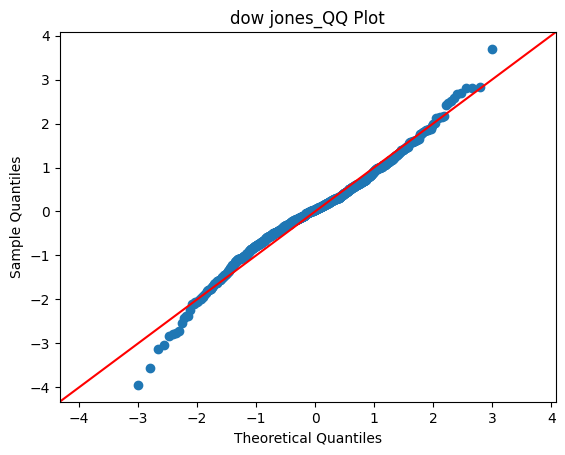

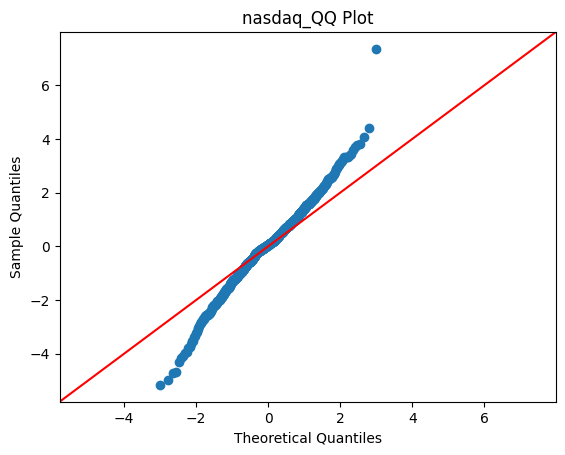

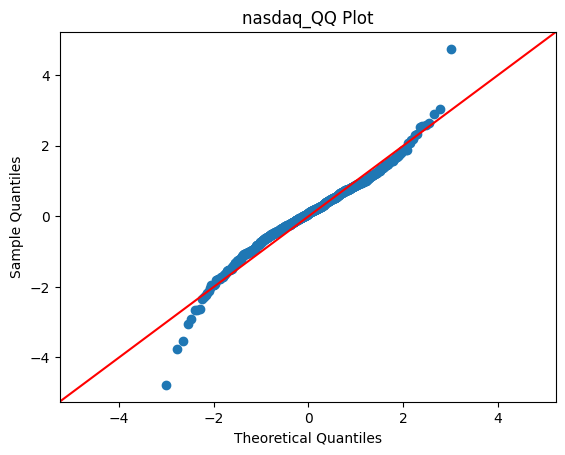

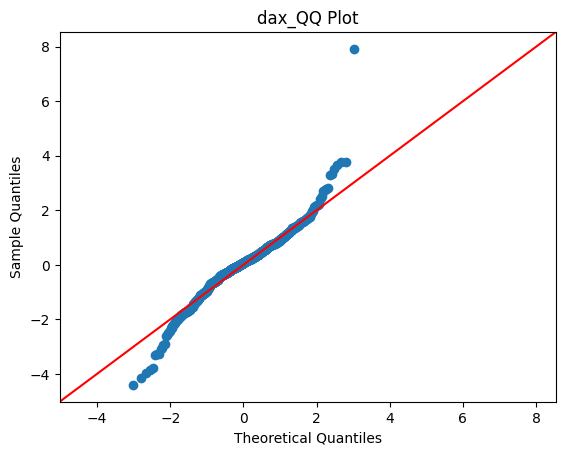

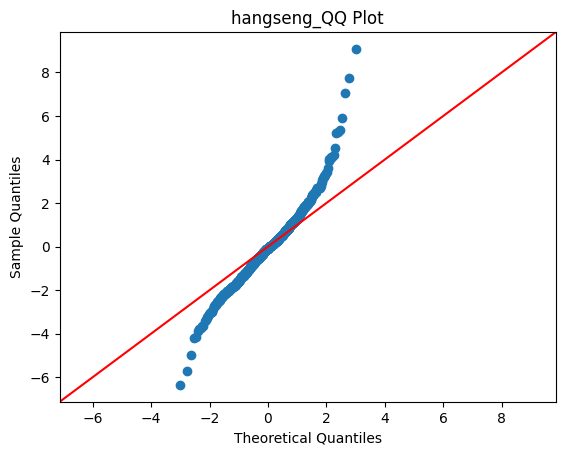

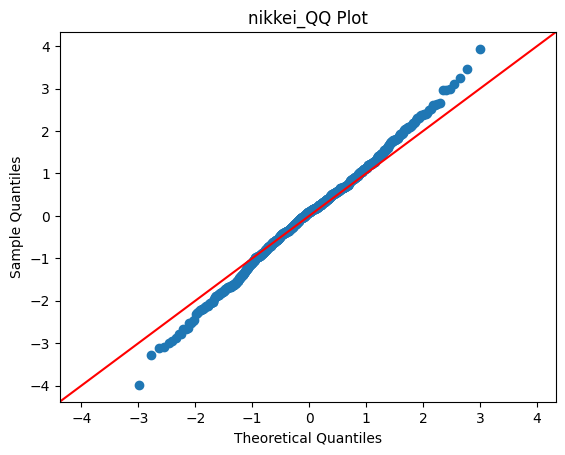

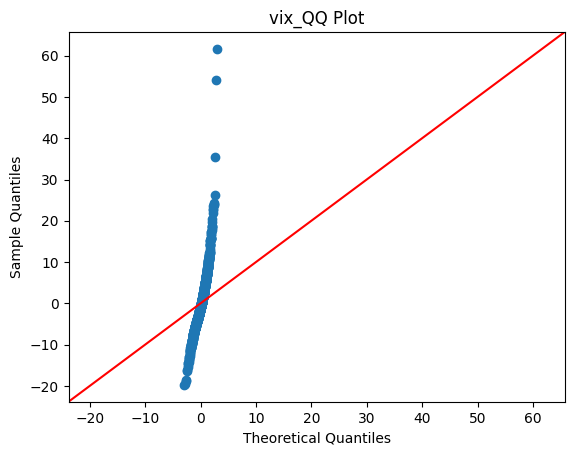

In [ ]:
qq_plot("dow jones",dow["return"])
qq_plot("nasdaq",nasdaq["return"])
qq_plot("nasdaq",nifty["return"])
qq_plot("dax",dax["return"])
qq_plot("hangseng",hangseng["return"])
qq_plot("nikkei",nikkei["return"])
qq_plot("vix",vix["return"])

In [ ]:
normality_test("dow jones",dow["return"])
normality_test("nasdaq",nasdaq["return"])
normality_test("nasdaq",nifty["return"])
normality_test("dax",dax["return"])
normality_test("hangseng",hangseng["return"])
normality_test("nikkei",nikkei["return"])
normality_test("vix",vix["return"])

Shapiro-Wilk Test:
Test Statistic: 0.9844145774841309
p-value: 3.5552224630919227e-07
dow jones does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9881016612052917
p-value: 8.627513125247788e-06
nasdaq does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9739699959754944
p-value: 3.338909981831506e-10
nasdaq does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9517946243286133
p-value: 3.968111765144692e-15
dax does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9675479531288147
p-value: 1.0723779503285513e-11
hangseng does not look normal (reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.997389018535614
p-value: 0.2974380850791931
nikkei looks normal (fail to reject H0)
Shapiro-Wilk Test:
Test Statistic: 0.9015059471130371
p-value: 1.3981295095674674e-21
vix does not look normal (reject H0)


# **7**

In [ ]:
def rename_columns(data_name,data):
  data.columns = [[f"{data_name}_Open",f"{data_name}_High",f"{data_name}_Low",f"{data_name}_Close",f"{data_name}_AdjClose",f"{data_name}_Volume",f"{data_name}_return"]]
  return data

renamed_dow = rename_columns("dow",dow)
renamed_nasdaq = rename_columns("nasdaq",nasdaq)
renamed_nifty = rename_columns("nifty",nifty)
renamed_dax = rename_columns("dax",dax)
renamed_hangseng = rename_columns("hangseng",hangseng)
renamed_nikkei = rename_columns("nikkei",nikkei)

renamed_vix = rename_columns("vix",vix)

renamed_dow.head()


,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return
Date,,,,,,,
2021-01-05,30204.250000,30504.890625,30141.779297,30391.599609,30391.599609,350910000,0.554889
2021-01-06,30362.779297,31022.650391,30313.070312,30829.400391,30829.400391,500430000,1.440532
2021-01-07,30901.179688,31193.400391,30897.859375,31041.130859,31041.130859,427810000,0.686781
2021-01-08,31069.580078,31140.669922,30793.269531,31097.970703,31097.970703,381150000,0.183111
2021-01-11,31015.369141,31096.980469,30832.060547,31008.689453,31008.689453,356540000,-0.287097


# **8**

In [ ]:
from functools import reduce
import pandas as pd

to_merge = [renamed_dow, renamed_nasdaq, renamed_nifty, renamed_dax, renamed_hangseng, renamed_nikkei, renamed_vix]
# Merge DataFrames using reduce and merge

master = pd.concat(to_merge, axis=1, join="outer")


In [ ]:
master.head()

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,nikkei_AdjClose,nikkei_Volume,nikkei_return,vix_Open,vix_High,vix_Low,vix_Close,vix_AdjClose,vix_Volume,vix_return
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,30204.250000,30504.890625,30141.779297,30391.599609,30391.599609,350910000.0,0.554889,12665.650391,12828.269531,12665.650391,...,27158.630859,55000000.0,-0.365942,26.940001,28.60,24.799999,25.340000,25.340000,0.0,-6.043749
2021-01-06,30362.779297,31022.650391,30313.070312,30829.400391,30829.400391,500430000.0,1.440532,12666.150391,12909.629883,12649.990234,...,27055.939453,72700000.0,-0.378117,25.480000,26.77,22.139999,25.070000,25.070000,0.0,-1.065511
2021-01-07,30901.179688,31193.400391,30897.859375,31041.130859,31041.130859,427810000.0,0.686781,12867.339844,13090.910156,12867.339844,...,27490.130859,98900000.0,1.604791,23.670000,23.91,22.250000,22.370001,22.370001,0.0,-10.769840
2021-01-08,31069.580078,31140.669922,30793.269531,31097.970703,31097.970703,381150000.0,0.183111,13160.219727,13208.089844,13036.549805,...,28139.029297,84900000.0,2.360478,22.430000,23.34,21.420000,21.559999,21.559999,0.0,-3.620927


In [ ]:
master.columns

MultiIndex([(         'dow_Open',),
            (         'dow_High',),
            (          'dow_Low',),
            (        'dow_Close',),
            (     'dow_AdjClose',),
            (       'dow_Volume',),
            (       'dow_return',),
            (      'nasdaq_Open',),
            (      'nasdaq_High',),
            (       'nasdaq_Low',),
            (     'nasdaq_Close',),
            (  'nasdaq_AdjClose',),
            (    'nasdaq_Volume',),
            (    'nasdaq_return',),
            (       'nifty_Open',),
            (       'nifty_High',),
            (        'nifty_Low',),
            (      'nifty_Close',),
            (   'nifty_AdjClose',),
            (     'nifty_Volume',),
            (     'nifty_return',),
            (         'dax_Open',),
            (         'dax_High',),
            (          'dax_Low',),
            (        'dax_Close',),
            (     'dax_AdjClose',),
            (       'dax_Volume',),
            (       'dax_ret

# **9**

In [ ]:
master = master.ffill()

# **10**

In [ ]:
master['month'] = master.index.month

# **11**

In [ ]:
master['quarter'] = master.index.quarter

# **12**

In [ ]:
master['year'] = master.index.year


# **13**

In [ ]:
master.head()

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,vix_Open,vix_High,vix_Low,vix_Close,vix_AdjClose,vix_Volume,vix_return,month,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2021
2021-01-05,30204.250000,30504.890625,30141.779297,30391.599609,30391.599609,350910000.0,0.554889,12665.650391,12828.269531,12665.650391,...,26.940001,28.60,24.799999,25.340000,25.340000,0.0,-6.043749,1,1,2021
2021-01-06,30362.779297,31022.650391,30313.070312,30829.400391,30829.400391,500430000.0,1.440532,12666.150391,12909.629883,12649.990234,...,25.480000,26.77,22.139999,25.070000,25.070000,0.0,-1.065511,1,1,2021
2021-01-07,30901.179688,31193.400391,30897.859375,31041.130859,31041.130859,427810000.0,0.686781,12867.339844,13090.910156,12867.339844,...,23.670000,23.91,22.250000,22.370001,22.370001,0.0,-10.769840,1,1,2021
2021-01-08,31069.580078,31140.669922,30793.269531,31097.970703,31097.970703,381150000.0,0.183111,13160.219727,13208.089844,13036.549805,...,22.430000,23.34,21.420000,21.559999,21.559999,0.0,-3.620927,1,1,2021


In [ ]:
master = master.dropna()

In [ ]:
print(master["dow_return"])

           dow_return
Date                 
2021-01-05   0.554889
2021-01-06   1.440532
2021-01-07   0.686781
2021-01-08   0.183111
2021-01-11  -0.287097
...               ...
2023-12-25  -0.049146
2023-12-26   0.426255
2023-12-27   0.296152
2023-12-28   0.142292
2023-12-29  -0.054528

[779 rows x 1 columns]


In [ ]:
print(master["nasdaq_return"])

           nasdaq_return
Date                    
2021-01-05      0.949012
2021-01-06     -0.609799
2021-01-07      2.564130
2021-01-08      1.029273
2021-01-11     -1.253984
...                  ...
2023-12-25      0.194466
2023-12-26      0.544259
2023-12-27      0.163251
2023-12-28     -0.026757
2023-12-29     -0.555080

[779 rows x 1 columns]


In [ ]:
master.head()

,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,nasdaq_Low,...,vix_Open,vix_High,vix_Low,vix_Close,vix_AdjClose,vix_Volume,vix_return,month,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-05,30204.250000,30504.890625,30141.779297,30391.599609,30391.599609,350910000.0,0.554889,12665.650391,12828.269531,12665.650391,...,26.940001,28.600000,24.799999,25.340000,25.340000,0.0,-6.043749,1,1,2021
2021-01-06,30362.779297,31022.650391,30313.070312,30829.400391,30829.400391,500430000.0,1.440532,12666.150391,12909.629883,12649.990234,...,25.480000,26.770000,22.139999,25.070000,25.070000,0.0,-1.065511,1,1,2021
2021-01-07,30901.179688,31193.400391,30897.859375,31041.130859,31041.130859,427810000.0,0.686781,12867.339844,13090.910156,12867.339844,...,23.670000,23.910000,22.250000,22.370001,22.370001,0.0,-10.769840,1,1,2021
2021-01-08,31069.580078,31140.669922,30793.269531,31097.970703,31097.970703,381150000.0,0.183111,13160.219727,13208.089844,13036.549805,...,22.430000,23.340000,21.420000,21.559999,21.559999,0.0,-3.620927,1,1,2021
2021-01-11,31015.369141,31096.980469,30832.060547,31008.689453,31008.689453,356540000.0,-0.287097,13048.780273,13138.269531,12999.509766,...,23.309999,24.809999,23.230000,24.080000,24.080000,0.0,11.688314,1,1,2021


In [ ]:
master.to_csv("stockgroup_2024_masterdata_2024March13.csv", index=False)
from google.colab import files
files.download("stockgroup_2024_masterdata_2024March13.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>